In [1]:
"""l'objectif est de trouver les bon paramètre alpha et beta pour l'arlorithme AntColonies"""


# External imports
import sys
import os
import pprint

# Add needed directories to the path
sys.path.append(os.path.join("..", "players"))

# PyRat imports
from pyrat import Game,StartingLocation
from AntColonies import AntColonies
from tqdm import tqdm

import numpy as np
import matplotlib.pyplot as plt
import random as rd

In [2]:
CONFIG = {"mud_percentage": 20.0,
          "cell_percentage": 80.0,
          "wall_percentage": 60.0,
          "maze_width": 25,
          "maze_height": 10,
          "nb_cheese": 41,
          "trace_length":1000,
          "trace_length": 50,
          "random_seed":42,
          "mud_range":[4,9]}
source=137
cheese=[89, 140, 41, 142, 17, 60, 122, 2, 63, 87, 206, 241, 179, 188, 237, 62, 155, 225, 3, 205, 19, 190, 220, 209, 164, 150, 65, 9, 145, 53, 84, 16, 92, 245, 199, 54, 104, 43, 208, 165, 243]


In [3]:
game = Game(**CONFIG)

# Instantiate a player and add it to the game
player = AntColonies(alpha=100,beta=100)
game.add_player(player,location=StartingLocation.CENTER)
maze=game.maze

class game_state:
    def __init__(self):
        self.player_locations = {player.name: source}
        self.cheese =cheese
game_state = game_state()
graph,_=player.maze_to_graph(maze,game_state)


Constructor
Constructor


In [4]:
def ant(alpha,beta,fourmis,repetition):
    player.alpha=alpha
    player.beta=beta
    player.ant=fourmis
    for i in range(repetition):
        totale=0
        
        try :
            path=player.AntColonies(graph,source)
            poid=0
            for i in range(len(path)-1):
                poid+=graph.get_weight(path[i],path[i+1])
        except:
            poid=float('inf')
        totale+=poid
    return totale/repetition

In [5]:
#data for the regression
boucle=20
fourmis=2000
repetition=10

#regression

alpha=[rd.uniform(0,100)]
beta=[rd.uniform(0,100)]
max=[ant(alpha,beta,fourmis,repetition)]
Good_direction=False
for i in tqdm(range(boucle)):
    if Good_direction==False:
        direction=rd.uniform(0,np.pi*2)
    new_alpha=alpha[-1]+np.cos(direction)
    new_beta=beta[-1]+np.sin(direction)
    new_max=ant(new_alpha,new_beta,fourmis,repetition)
    if new_max<max[-1]:
        max.append(new_max)
        alpha.append(new_alpha)
        beta.append(new_beta)
        Good_direction=True




100%|██████████| 20/20 [02:31<00:00,  7.59s/it]


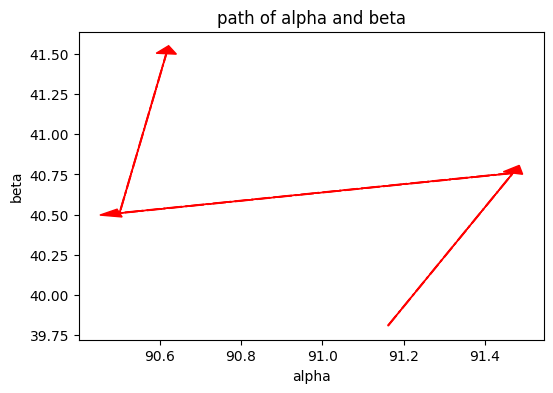

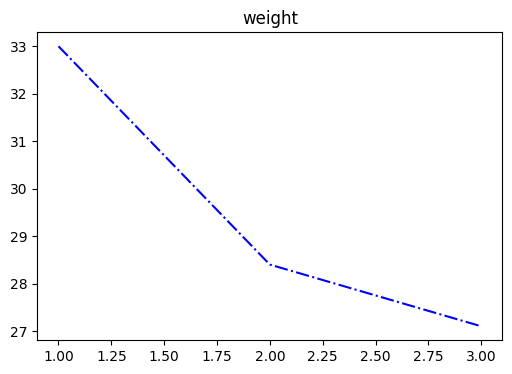

In [ ]:
# plot que path of alpha and beta
plt.figure(figsize=(6, 4))
plt.plot(alpha, beta,'r-.')

for i in range(len(alpha)-1):
    plt.arrow(
    alpha[i], beta[i], 
    alpha[i+1]-alpha[i], beta[i+1]-beta[i],
    head_width=0.05,head_length=0.05,fc='red',ec='red')

plt.title("path of alpha and beta")
plt.xlabel("alpha")
plt.ylabel("beta")
plt.show()
plt.figure(figsize=(6, 4))
plt.plot(list(range(len(max))),max,"b-.")
plt.title("weight")
plt.show()

In [ ]:
print(max)
print(alpha)

[inf, 33.0, 28.4, 27.1]
[91.16176324703332, np.float64(91.46946093157875), np.float64(90.50110241562379), np.float64(90.61612076773399)]
